In [2]:
from IPython.display import display, HTML

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as npy
from scipy.stats import linregress
from sklearn.model_selection import GroupShuffleSplit
import dataframe_image as dfi

bg = pd.read_feather("boardgamegeek.feather")
np = pd.read_feather("netflix_prize.feather")
m = pd.read_feather("movielens_25m.feather") 
y = pd.read_feather("yahoo_r2_songs.subsampled.feather")

In [4]:
plt.rcParams['figure.dpi'] = 400

In [5]:
bg = bg[bg['user_id'].notnull()]

In [6]:
groups = bg['user_id']

In [7]:
gss = GroupShuffleSplit(n_splits=1,test_size=0.25,random_state=42)

In [8]:
train_idx,test_idx = next(gss.split(bg,groups=groups))

In [9]:
# no user id in the train is also in the test verify
# bg.iloc[train_idx].merge(bg.iloc[test_idx],how='inner',on='user_id')

In [10]:
train_data = bg.iloc[train_idx]
test_data = bg.iloc[test_idx]

In [11]:
max(train_data.rating)

10.0

In [12]:
bg_preds = train_data.groupby('item_id').agg(
    ave_rating_pred=('rating','mean'),
    num_rating_pred=('rating','count'),
    pos_rating_pred=('rating',lambda x: (x>7.5).sum())
)

In [13]:
bg_eval = test_data.merge(bg_preds,how='inner',on='item_id')

In [14]:
slope1,intercept1,r_value1,p_value1,std_err1 = linregress(bg_eval['rating'],bg_eval['num_rating_pred'])
slope2,intercept2,r_value2,p_value2,std_err2 = linregress(bg_eval['rating'],bg_eval['pos_rating_pred'])
slope3,intercept3,r_value3,p_value3,std_err3 = linregress(bg_eval['rating'],bg_eval['ave_rating_pred'])

In [15]:
res_builder = pd.DataFrame(columns = ['Dataset','R^2_Awareness','R^2 Popularity','R^2 Average Ratings'])

In [16]:
res_builder.loc[len(res_builder.index)] = ['Board Game Geek',r_value1**2,r_value2**2,r_value3**2]

In [17]:
np = np[np['user_id'].notnull()]
groups = np['user_id']
train_idx,test_idx = next(gss.split(np,groups=groups))
train_data = np.iloc[train_idx]
test_data = np.iloc[test_idx]

In [18]:
set(train_data.rating)

{1, 2, 3, 4, 5}

In [19]:
np_preds = train_data.groupby('item_id').agg(
    ave_rating_pred=('rating','mean'),
    num_rating_pred=('rating','count'),
    pos_rating_pred=('rating',lambda x: (x>=4).sum())
)
np_eval = test_data.merge(np_preds,how='inner',on='item_id')

slope1,intercept1,r_value1,p_value1,std_err1 = linregress(np_eval['rating'],np_eval['num_rating_pred'])
slope2,intercept2,r_value2,p_value2,std_err2 = linregress(np_eval['rating'],np_eval['pos_rating_pred'])
slope3,intercept3,r_value3,p_value3,std_err3 = linregress(np_eval['rating'],np_eval['ave_rating_pred'])

In [20]:
res_builder.loc[len(res_builder.index)] = ['Netflix Prize',r_value1**2,r_value2**2,r_value3**2]

In [21]:
m = m[m['user_id'].notnull()]
groups = m['user_id']
train_idx,test_idx = next(gss.split(m,groups=groups))
train_data = m.iloc[train_idx]
test_data = m.iloc[test_idx]

In [22]:
set(train_data.rating)

{0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0}

In [23]:
m_preds = train_data.groupby('item_id').agg(
    ave_rating_pred=('rating','mean'),
    num_rating_pred=('rating','count'),
    pos_rating_pred=('rating',lambda x: (x>=4).sum())
)
m_eval = test_data.merge(m_preds,how='inner',on='item_id')

slope1,intercept1,r_value1,p_value1,std_err1 = linregress(m_eval['rating'],m_eval['num_rating_pred'])
slope2,intercept2,r_value2,p_value2,std_err2 = linregress(m_eval['rating'],m_eval['pos_rating_pred'])
slope3,intercept3,r_value3,p_value3,std_err3 = linregress(m_eval['rating'],m_eval['ave_rating_pred'])

In [24]:
res_builder.loc[len(res_builder.index)] = ['Movie Lens',r_value1**2,r_value2**2,r_value3**2]

In [25]:
y = y[y['user_id'].notnull()]
groups = y['user_id']
train_idx,test_idx = next(gss.split(y,groups=groups))
train_data = y.iloc[train_idx]
test_data = y.iloc[test_idx]

In [26]:
set(train_data.rating)

{1, 2, 3, 4, 5}

In [27]:
y_preds = train_data.groupby('item_id').agg(
    ave_rating_pred=('rating','mean'),
    num_rating_pred=('rating','count'),
    pos_rating_pred=('rating',lambda x: (x>=4).sum())
)
y_eval = test_data.merge(y_preds,how='inner',on='item_id')

slope1,intercept1,r_value1,p_value1,std_err1 = linregress(y_eval['rating'],y_eval['num_rating_pred'])
slope2,intercept2,r_value2,p_value2,std_err2 = linregress(y_eval['rating'],y_eval['pos_rating_pred'])
slope3,intercept3,r_value3,p_value3,std_err3 = linregress(y_eval['rating'],y_eval['ave_rating_pred'])

In [28]:
res_builder.loc[len(res_builder.index)] = ['Yahoo Music',r_value1**2,r_value2**2,r_value3**2]

In [31]:
styled = res_builder.style.background_gradient() 
display(HTML(styled.to_html().replace(
    '<table',
    '<table style="width:25%; font-size:14px; text-align:center;"'
)))

,Dataset,R^2_Awareness,R^2 Popularity,R^2 Average Ratings
0,Board Game Geek,0.035542,0.062561,0.254894
1,Netflix Prize,0.009141,0.027373,0.131334
2,Movie Lens,0.039161,0.055672,0.180857
3,Yahoo Music,0.005211,0.012342,0.113526


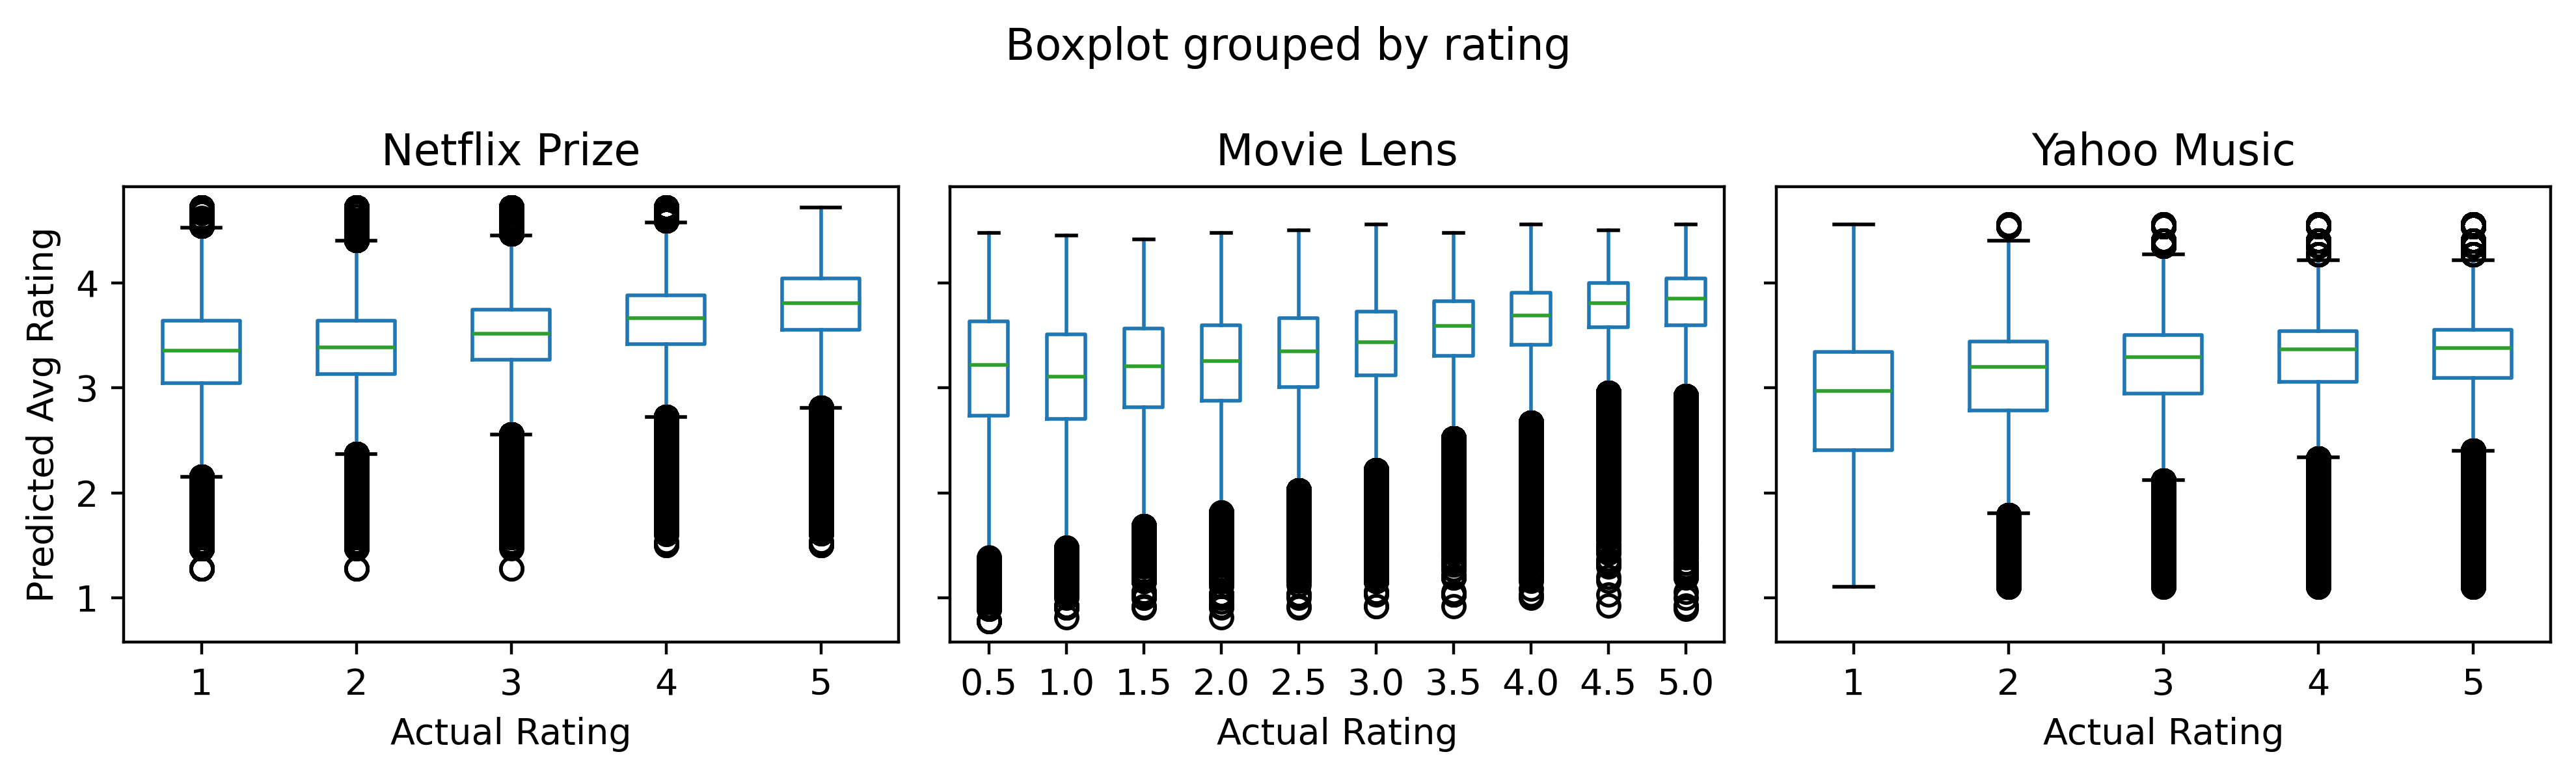

In [32]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

np_eval.boxplot(column='ave_rating_pred', by='rating', ax=axes[0], grid=False)
axes[0].set_title('Netflix Prize')
axes[0].set_xlabel('Actual Rating')
axes[0].set_ylabel('Predicted Avg Rating')

m_eval.boxplot(column='ave_rating_pred', by='rating', ax=axes[1], grid=False)
axes[1].set_title('Movie Lens')
axes[1].set_xlabel('Actual Rating')

y_eval.boxplot(column='ave_rating_pred', by='rating', ax=axes[2], grid=False)
axes[2].set_title('Yahoo Music')
axes[2].set_xlabel('Actual Rating')

plt.tight_layout()
plt.savefig('2-2-box-plots.png')
plt.show()